In [1]:
# Integrantes: Guilherme Sanche e Vitor Vieira
# Tema: Como o Índice de Atividade Econômico Regional para o AM é impactado a partir do Índice de Volume de Serviços (AM),
# do Índice de Varejo Ampliado (AM), da Balança Comercial (AM), da taxa de inflação (BR), da taxa de juros (BR) e
# da renda disponível das famílias (Brasil)?
# Variáveis escolhidas: variável dependente Y = IBCR-AM (Índice de Atividade Econômica Regional para o Amazonas)
# variáveis independentes X =  Índice de volume de serviços (Amazonas), Índice de Varejo Ampliado (Amazonas),
# Balança Comercial (Amazonas), Taxa de Inflação (IPCA, Brasil), Taxa de Juros (Selic, Brasil), 
# Renda disponível das famílias (Brasil)
# Tamanho da Amostra: mensal, começando em 2011-12-01 e terminando em 2021-12-31. n=121

In [1]:
from bcb import sgs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as sbn
import datetime
import numpy as np
plt.style.use('seaborn')

In [2]:
projeto=sgs.get({'ibcr_para_dessazonalizado':25410,
                 'indice_volume_servicos_pa':24006, 
                 'indice_varejo_pa_ampliado':21191,
                 'bal_pa':12598,
                 'import_pa':13153,
                 'ipca':433,
                },
               start='2011-12-01',
               end='2021-12-31')

In [8]:
projeto.head()

,ibcr_para_dessazonalizado,indice_volume_servicos_pa,indice_varejo_pa_ampliado,bal_pa,import_pa,ipca
Date,,,,,,
2011-12-01,153.96,105.4,119.79,-655659,743698,0.50
2012-01-01,146.85,91.5,84.93,-965132,1025392,0.56
2012-02-01,145.07,90.2,78.78,-921030,984830,0.45
2012-03-01,149.49,94.2,91.17,-1086702,1162485,0.21
2012-04-01,152.79,91.6,83.14,-879429,950129,0.64


In [9]:
projeto.reset_index()

,Date,ibcr_para_dessazonalizado,indice_volume_servicos_pa,indice_varejo_pa_ampliado,bal_pa,import_pa,ipca
0,2011-12-01,153.96,105.40,119.79,-655659,743698,0.50
1,2012-01-01,146.85,91.50,84.93,-965132,1025392,0.56
2,2012-02-01,145.07,90.20,78.78,-921030,984830,0.45
3,2012-03-01,149.49,94.20,91.17,-1086702,1162485,0.21
4,2012-04-01,152.79,91.60,83.14,-879429,950129,0.64
...,...,...,...,...,...,...,...
116,2021-08-01,177.50,93.68,119.95,-1160239,1223397,0.87
117,2021-09-01,174.13,90.43,111.75,-1096480,1162277,1.16
118,2021-10-01,172.32,93.55,116.38,-1107635,1182733,1.25
119,2021-11-01,177.07,94.86,125.05,-1146488,1205718,0.95


In [10]:
projeto.to_csv('projeto_pa.csv')

In [4]:
projeto.isnull().any()

ibcr_amaz_dessazonalizado    False
indice_volume_servicos_am    False
indice_varejo_am_ampliado    False
bal_am                       False
ipca                         False
renda_nac_def_medmov         False
dtype: bool

In [7]:
projeto.reset_index()

,Date,ibcr_amaz_dessazonalizado,indice_volume_servicos_am,indice_varejo_am_ampliado,bal_am,ipca,renda_nac_def_medmov
0,2011-12-01,151.72,102.10,116.66,-655659,0.50,350997
1,2012-01-01,152.23,86.10,86.82,-965132,0.56,354017
2,2012-02-01,151.65,87.30,82.85,-921030,0.45,356494
3,2012-03-01,150.44,93.40,93.47,-1086702,0.21,358530
4,2012-04-01,151.27,90.50,88.85,-879429,0.64,361388
...,...,...,...,...,...,...,...
116,2021-08-01,148.39,91.85,115.74,-1160239,0.87,388769
117,2021-09-01,145.46,92.69,109.92,-1096480,1.16,375235
118,2021-10-01,146.48,89.74,112.85,-1107635,1.25,370714
119,2021-11-01,147.50,95.98,120.70,-1146488,0.95,370201


In [13]:
projeto.head(100)

,ibcr_amaz_dessazonalizado,indice_volume_servicos_am,indice_varejo_am_ampliado,bal_am,ipca,renda_nac_bru,renda_desinf
Date,,,,,,,
2011-12-01,151.94,102.1,116.66,-655659,0.50,249790,NaN
2012-01-01,152.15,86.1,86.82,-965132,0.56,251747,NaN
2012-02-01,152.66,87.3,82.85,-921030,0.45,250722,NaN
2012-03-01,150.46,93.4,93.47,-1086702,0.21,247435,NaN
2012-04-01,151.11,90.5,88.85,-879429,0.64,248694,NaN
...,...,...,...,...,...,...,...
2019-11-01,149.66,85.0,115.56,-598228,0.51,457419,NaN
2019-12-01,147.79,89.8,121.10,-615079,1.15,482236,NaN
2020-01-01,151.85,77.9,106.03,-893255,0.21,475640,NaN


In [18]:
renda = pd.read_csv('renda_desinf.csv')

In [21]:
renda

,Date,renda_df
0,2011-12-01,451377.344868
1,2012-01-01,452650.976981
2,2012-02-01,448297.636980
3,2012-03-01,440438.747539
4,2012-04-01,441752.136251
...,...,...
116,2021-08-01,512642.925411
117,2021-09-01,493093.342875
118,2021-10-01,474537.561116
119,2021-11-01,474754.056256


In [58]:
projeto2=projeto.reset_index()

In [59]:
projeto2

,Date,ibcr_amaz_dessazonalizado,indice_volume_servicos_am,indice_varejo_am_ampliado,bal_am,ipca,renda_nac_bru
0,2011-12-01,151.94,102.10,116.66,-655659,0.50,249790
1,2012-01-01,152.15,86.10,86.82,-965132,0.56,251747
2,2012-02-01,152.66,87.30,82.85,-921030,0.45,250722
3,2012-03-01,150.46,93.40,93.47,-1086702,0.21,247435
4,2012-04-01,151.11,90.50,88.85,-879429,0.64,248694
...,...,...,...,...,...,...,...
116,2021-08-01,148.60,91.85,115.74,-1160239,0.87,487960
117,2021-09-01,145.47,92.69,109.92,-1096480,1.16,473435
118,2021-10-01,147.20,89.74,112.85,-1107635,1.25,460904
119,2021-11-01,148.27,95.98,120.70,-1146488,0.95,466878


In [92]:
renda_des=renda['renda_df']

In [93]:
renda_des

0      451377.344868
1      452650.976981
2      448297.636980
3      440438.747539
4      441752.136251
           ...      
116    512642.925411
117    493093.342875
118    474537.561116
119    474754.056256
120    496991.540977
Name: renda_df, Length: 121, dtype: float64

In [94]:
projeto3 = projeto2.assign(renda_desinf=renda_des)

In [95]:
projeto3

,Date,ibcr_amaz_dessazonalizado,indice_volume_servicos_am,indice_varejo_am_ampliado,bal_am,ipca,renda_nac_bru,renda_desinf
0,2011-12-01,151.94,102.10,116.66,-655659,0.50,249790,451377.344868
1,2012-01-01,152.15,86.10,86.82,-965132,0.56,251747,452650.976981
2,2012-02-01,152.66,87.30,82.85,-921030,0.45,250722,448297.636980
3,2012-03-01,150.46,93.40,93.47,-1086702,0.21,247435,440438.747539
4,2012-04-01,151.11,90.50,88.85,-879429,0.64,248694,441752.136251
...,...,...,...,...,...,...,...,...
116,2021-08-01,148.60,91.85,115.74,-1160239,0.87,487960,512642.925411
117,2021-09-01,145.47,92.69,109.92,-1096480,1.16,473435,493093.342875
118,2021-10-01,147.20,89.74,112.85,-1107635,1.25,460904,474537.561116
119,2021-11-01,148.27,95.98,120.70,-1146488,0.95,466878,474754.056256


In [78]:
projeto3.set_index('Date', inplace=True)

In [97]:
projeto3

,Date,ibcr_amaz_dessazonalizado,indice_volume_servicos_am,indice_varejo_am_ampliado,bal_am,ipca,renda_nac_bru,renda_desinf,selic
0,2011-12-01,151.94,102.10,116.66,-655659,0.50,249790,451377.344868,11.00
1,2012-01-01,152.15,86.10,86.82,-965132,0.56,251747,452650.976981,11.00
2,2012-02-01,152.66,87.30,82.85,-921030,0.45,250722,448297.636980,10.50
3,2012-03-01,150.46,93.40,93.47,-1086702,0.21,247435,440438.747539,10.50
4,2012-04-01,151.11,90.50,88.85,-879429,0.64,248694,441752.136251,9.75
...,...,...,...,...,...,...,...,...,...
116,2021-08-01,148.60,91.85,115.74,-1160239,0.87,487960,512642.925411,4.25
117,2021-09-01,145.47,92.69,109.92,-1096480,1.16,473435,493093.342875,5.25
118,2021-10-01,147.20,89.74,112.85,-1107635,1.25,460904,474537.561116,6.25
119,2021-11-01,148.27,95.98,120.70,-1146488,0.95,466878,474754.056256,7.75


In [80]:
projeto3.to_csv('projeto3.csv')

<AxesSubplot:xlabel='Date'>

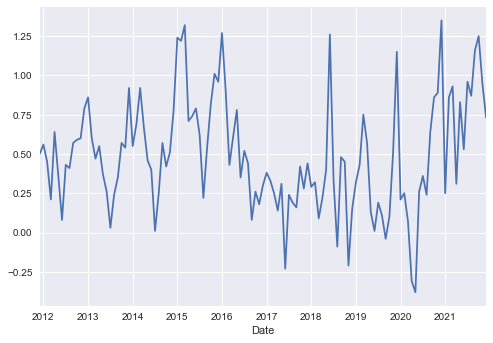

In [52]:
projeto['ipca'].plot()

In [81]:
selic = pd.read_csv('selic.csv')

In [83]:
selic = selic['selic']

In [96]:
projeto3 = projeto3.assign(selic=selic)

In [88]:
projeto3

,Date,ibcr_amaz_dessazonalizado,indice_volume_servicos_am,indice_varejo_am_ampliado,bal_am,ipca,renda_nac_bru,selic
0,2011-12-01,151.94,102.10,116.66,-655659,0.50,249790,11.00
1,2012-01-01,152.15,86.10,86.82,-965132,0.56,251747,11.00
2,2012-02-01,152.66,87.30,82.85,-921030,0.45,250722,10.50
3,2012-03-01,150.46,93.40,93.47,-1086702,0.21,247435,10.50
4,2012-04-01,151.11,90.50,88.85,-879429,0.64,248694,9.75
...,...,...,...,...,...,...,...,...
116,2021-08-01,148.60,91.85,115.74,-1160239,0.87,487960,4.25
117,2021-09-01,145.47,92.69,109.92,-1096480,1.16,473435,5.25
118,2021-10-01,147.20,89.74,112.85,-1107635,1.25,460904,6.25
119,2021-11-01,148.27,95.98,120.70,-1146488,0.95,466878,7.75


In [98]:
projeto3.set_index('Date', inplace=True)

In [99]:
projeto4 = projeto3

In [100]:
projeto4.to_csv('projeto4.csv')

<AxesSubplot:xlabel='indice_volume_servicos_am', ylabel='ibcr_amaz_dessazonalizado'>

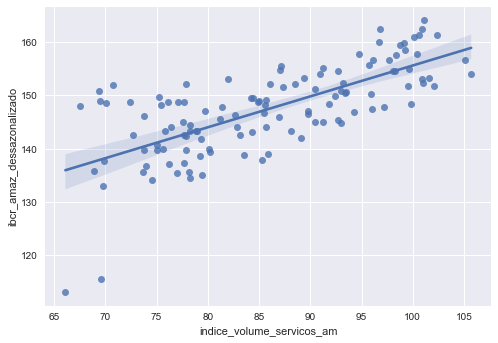

In [18]:
sns.regplot(x='indice_volume_servicos_am', y='ibcr_amaz_dessazonalizado', data=projeto)